In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [66]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [67]:
X = dataset[["Age", "EstimatedSalary"]]

In [68]:
y = dataset[["Purchased"]]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(scaler.transform(X_test))

/home/rajdeep/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [76]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, y_pred)

# this is without feature scaling

0.68

In [52]:
accuracy_score(y_test, y_pred)

# and, this is with feature scaling done BEFORE splitting (somehow its the same as not scaling at all)

0.68

In [77]:
accuracy_score(y_test, y_pred)

# and, this is with feature scaling done AFTER SPLITTING. instructor concurs with this.

0.89

In [78]:
LogisticRegression().fit(X_train, y_train).predict(scaler.transform([[30, 87000]]))

/home/rajdeep/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0])

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]])

In [117]:
boughtage = []
boughtsalary = []
noughtage = []
noughtsalary = []

for idx, row in dataset.iterrows():
    if row["Purchased"]:
        boughtage.append(row["Age"])
        boughtsalary.append(row["EstimatedSalary"])
    else:
        noughtage.append(row["Age"])
        noughtsalary.append(row["EstimatedSalary"])

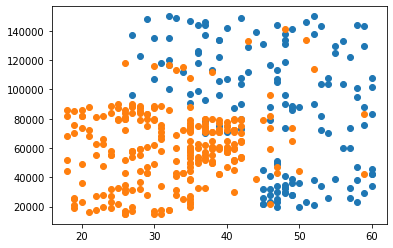

In [120]:
plt.scatter(boughtage, boughtsalary)
plt.scatter(noughtage, noughtsalary)
plt.show()

# i see. i hope pocahontas has a better solution
# update: nvm lol his code is way too complicated

In [124]:
# holy crap ponto wasnt kidding when he said this code is complex
# my RAM of notebook environment or whatever doesnt even have 1 gig of RAM to accomodate for this
# but whatever, ponto also said i'm never gonna need to use this so

from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, LogisticRegression().fit(X_train, y_train).predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 1.01 GiB for an array with shape (548000, 248) and data type float64